In [1]:
import pandas as pd
import numpy as np
import time
from os import walk
names = ['smsIn','smsOut','callIn','callOut','Internet']

In [17]:
def NumConvert900to10000(num):
    r = num//30
    c = num - (r)*30
    r_ = 40 + r
    c_ = 40 + c
    n = 100 * r_ + c_ + 1
    return int(n)

In [76]:
#450 6 451
import pandas as pd
dir_ = '../data/interim/gridTraffic_Nov_all'
grid450 = pd.read_csv('{}/grid{}.csv'.format(dir_,NumConvert900to10000(450)),names = ['time','1','2','3','4','traffic'])
grid6 = pd.read_csv('{}/grid{}.csv'.format(dir_,NumConvert900to10000(6)),names = ['time','1','2','3','4','traffic'])
grid451 = pd.read_csv('{}/grid{}.csv'.format(dir_,NumConvert900to10000(451)),names = ['time','1','2','3','4','traffic'])

In [77]:
from datetime import datetime
grid450['time'] = grid450['time'].apply(lambda x : datetime.fromtimestamp(x//1000))
grid6['time'] = grid6['time'].apply(lambda x : datetime.fromtimestamp(x//1000))
grid451['time'] = grid451['time'].apply(lambda x : datetime.fromtimestamp(x//1000))

Text(0,0.5,'Data Traffic')

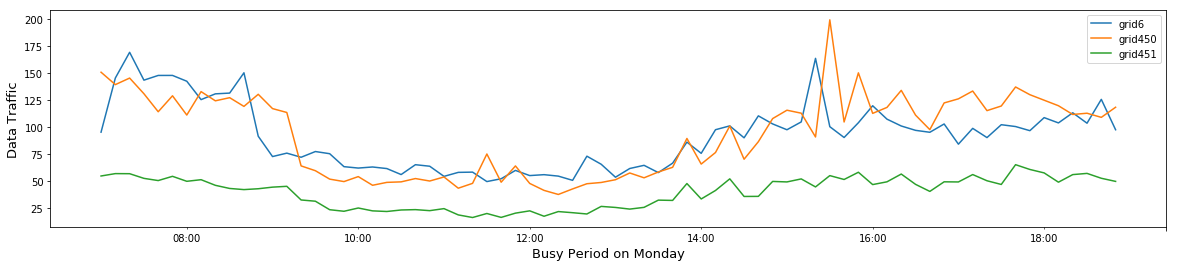

In [125]:
#grid6[450:800].plot(x = 'time',y = 'traffic',figsize =(18,4),legend=True,label='grid6')
grid6[144*5:int(144*5.5)].set_index('time')['traffic'].plot(figsize =(20,4),legend=True,label='grid6')
grid450[144*5:int(144*5.5)].set_index('time')['traffic'].plot(legend=True,label='grid450')
grid451[144*5:int(144*5.5)].set_index('time')['traffic'].plot(legend=True,label='grid451')
plt.autoscale(False)
plt.xlabel('Busy Period on Monday',size = 13)
plt.ylabel('Data Traffic',size = 13)

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
dir_ = '../data/interim/grid5050'
grid1 = pd.read_csv('{}/grid{}.csv'.format(dir_,1))
grid1428 = pd.read_csv('{}/grid{}.csv'.format(dir_,1428))
grid1375 = pd.read_csv('{}/grid{}.csv'.format(dir_,1375))
grid2499 = pd.read_csv('{}/grid{}.csv'.format(dir_,2499))

## traffic

**每日网络流量活动呈现出明显的周期性**

**所以可以考虑 周期性的规律变化**

**中心地带的变化较为明显，波动较大**

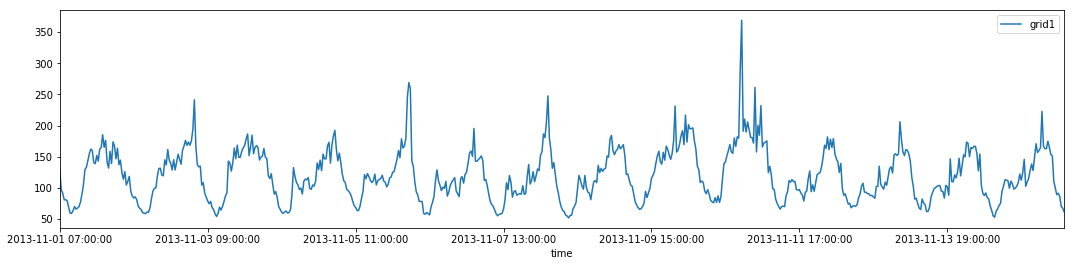

In [25]:
grid1[:680].set_index('time')['traffic'].plot(figsize =(18,4),legend=True,label='grid1')

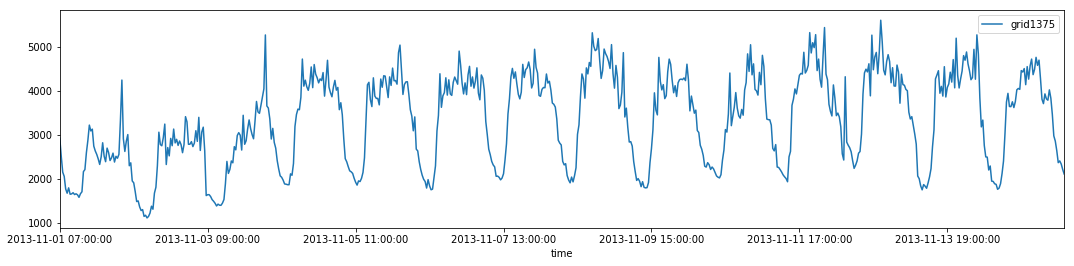

In [29]:
grid1375[:680].set_index('time')['traffic'].plot(figsize =(18,4),legend=True,label='grid1375')

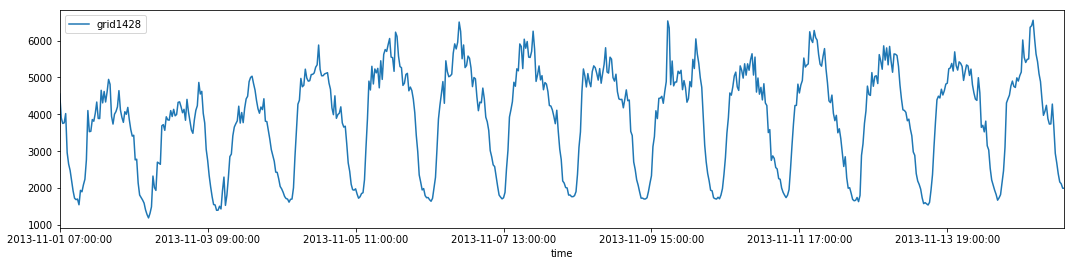

In [30]:
grid1428[:680].set_index('time')['traffic'].plot(figsize =(18,4),legend=True,label='grid1428')

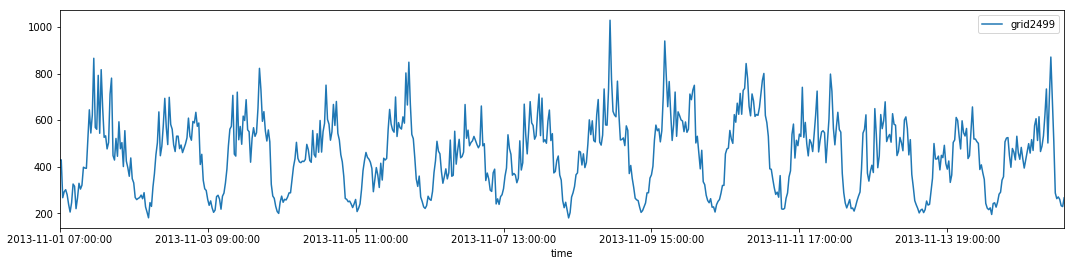

In [31]:
grid2499[:680].set_index('time')['traffic'].plot(figsize =(18,4),legend=True,label='grid2499')

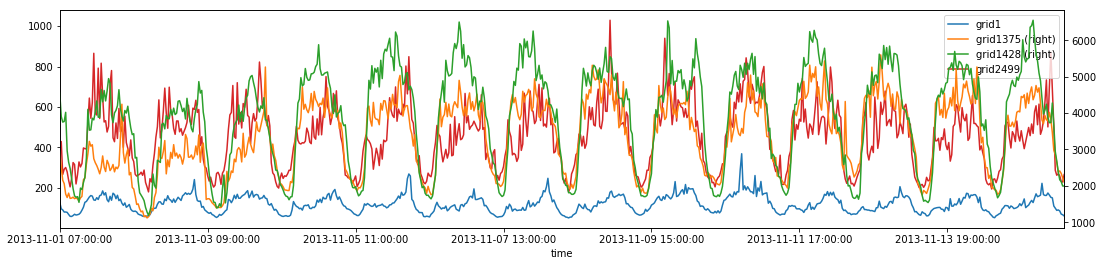

In [24]:
grid1[:680].set_index('time')['traffic'].plot(figsize =(18,4),legend=True,label='grid1')
grid1375[:680].set_index('time')['traffic'].plot(legend=True,label='grid1375',secondary_y=True)
grid1428[:680].set_index('time')['traffic'].plot(legend=True,label='grid1428',secondary_y=True)
grid2499[:680].set_index('time')['traffic'].plot(legend=True,label='grid2499')

## sms_in

**在中心地带，周末的收短信峰值低于平日**

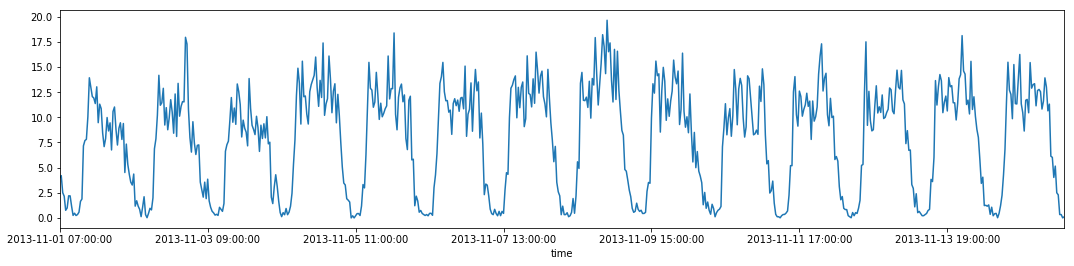

In [32]:
grid1[:680].set_index('time')['sms_in'].plot(figsize =(18,4))

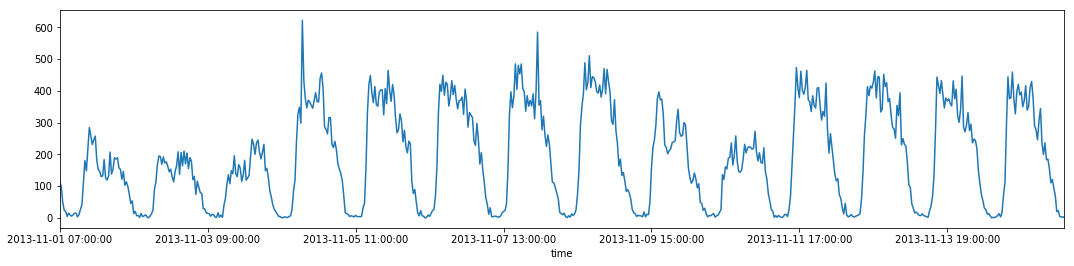

In [33]:
grid1375[:680].set_index('time')['sms_in'].plot(figsize =(18,4))

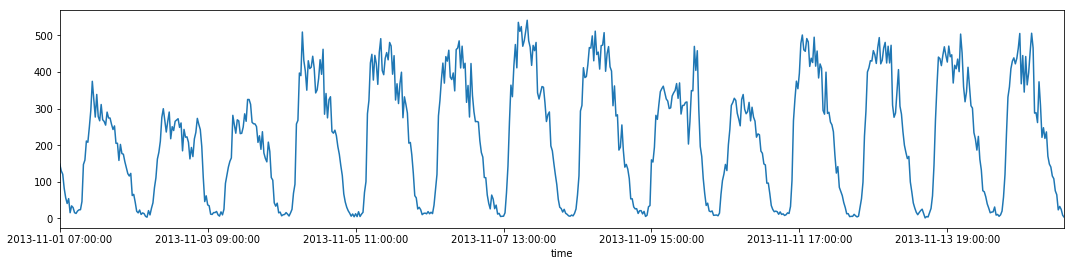

In [34]:
grid1428[:680].set_index('time')['sms_in'].plot(figsize =(18,4))

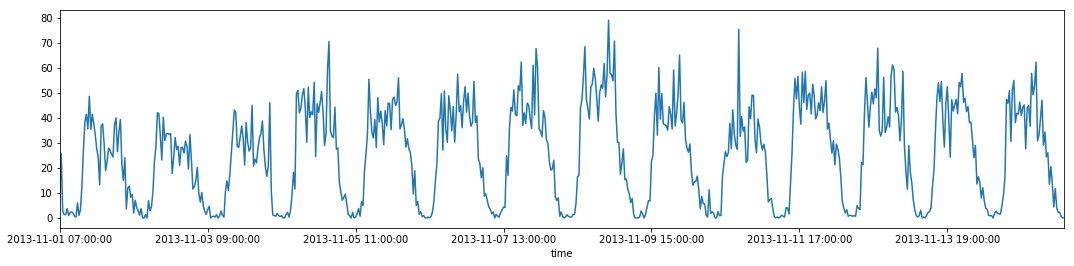

In [35]:
grid2499[:680].set_index('time')['sms_in'].plot(figsize =(18,4))

## sms_out

**无明显发现**

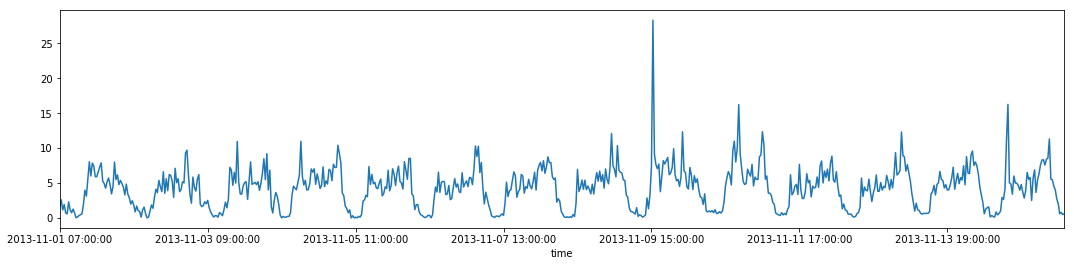

In [36]:
grid1[:680].set_index('time')['sms_out'].plot(figsize =(18,4))

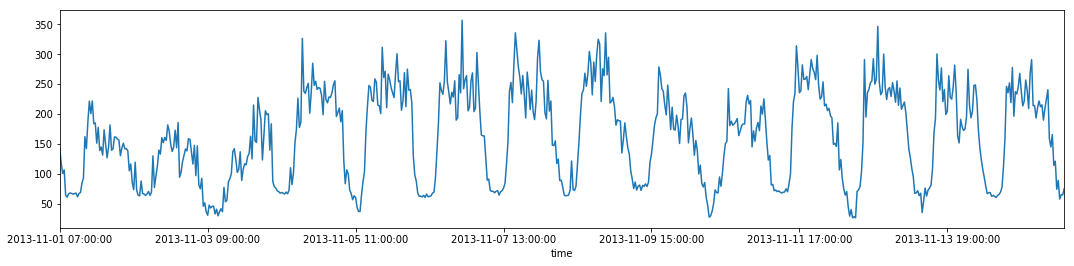

In [37]:
grid1375[:680].set_index('time')['sms_out'].plot(figsize =(18,4))

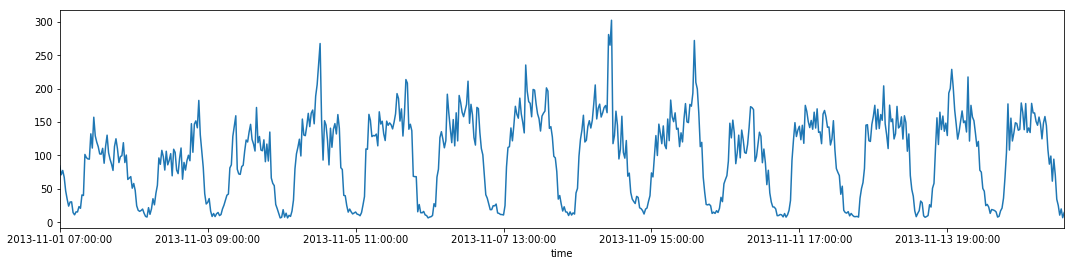

In [38]:
grid1428[:680].set_index('time')['sms_out'].plot(figsize =(18,4))

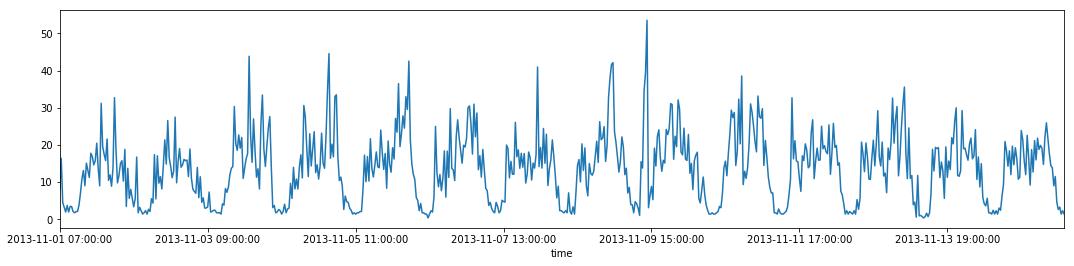

In [39]:
grid2499[:680].set_index('time')['sms_out'].plot(figsize =(18,4))

## call_in

**周末呼入少于工作日呼入**

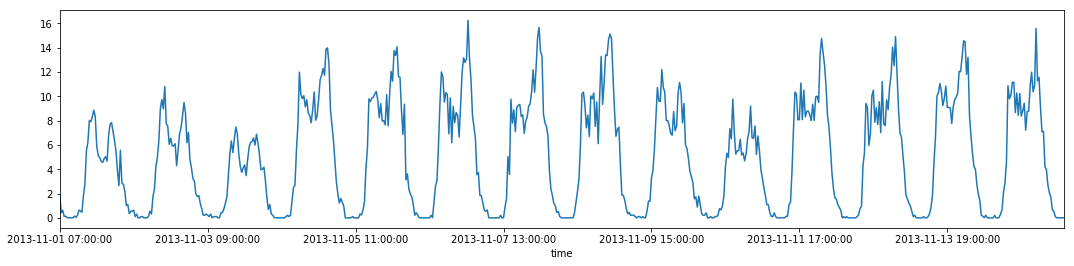

In [40]:
grid1[:680].set_index('time')['call_in'].plot(figsize =(18,4))

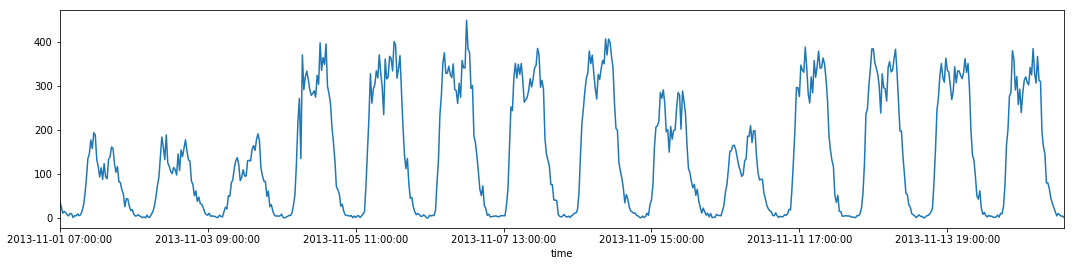

In [41]:
grid1375[:680].set_index('time')['call_in'].plot(figsize =(18,4))

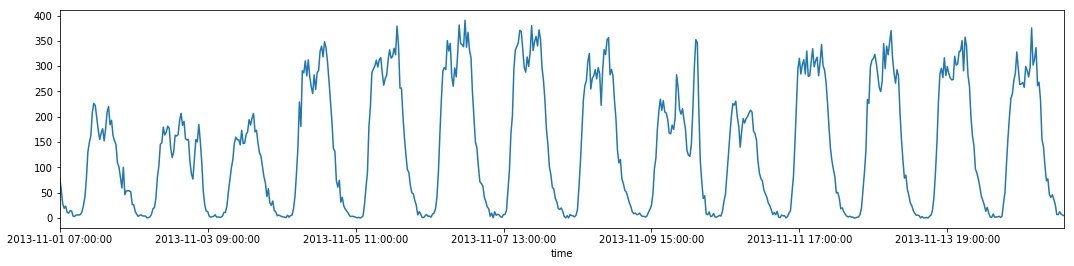

In [42]:
grid1428[:680].set_index('time')['call_in'].plot(figsize =(18,4))

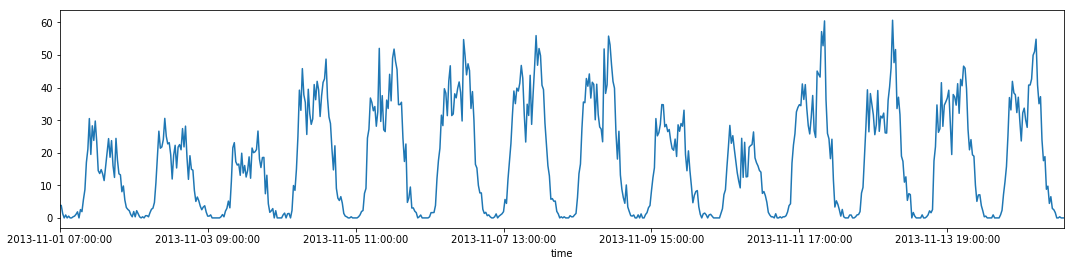

In [43]:
grid2499[:680].set_index('time')['call_in'].plot(figsize =(18,4))

## call_out

**同样，周末呼出少于工作日呼出**

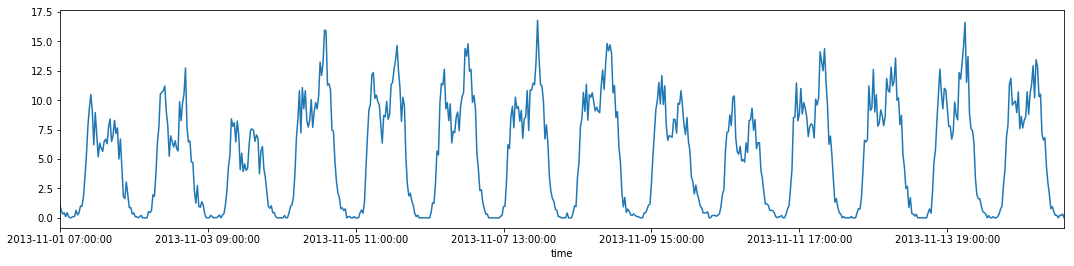

In [44]:
grid1[:680].set_index('time')['call_out'].plot(figsize =(18,4))

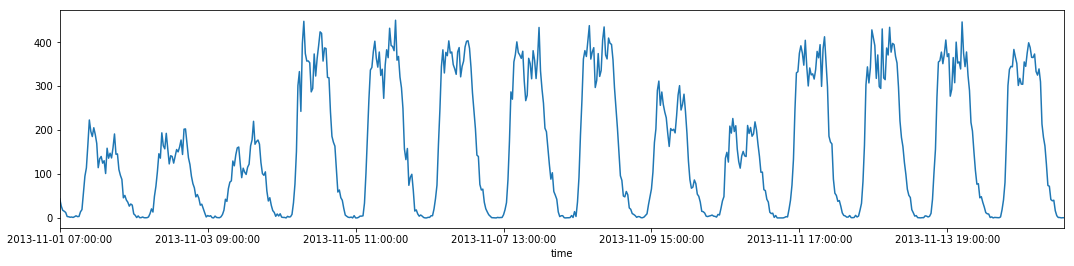

In [45]:
grid1375[:680].set_index('time')['call_out'].plot(figsize =(18,4))

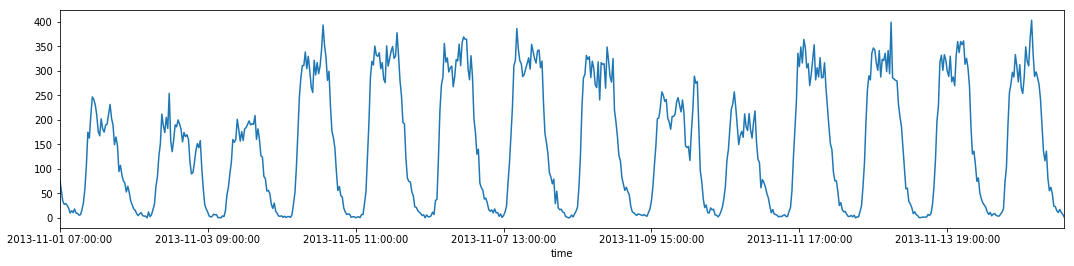

In [46]:
grid1428[:680].set_index('time')['call_out'].plot(figsize =(18,4))

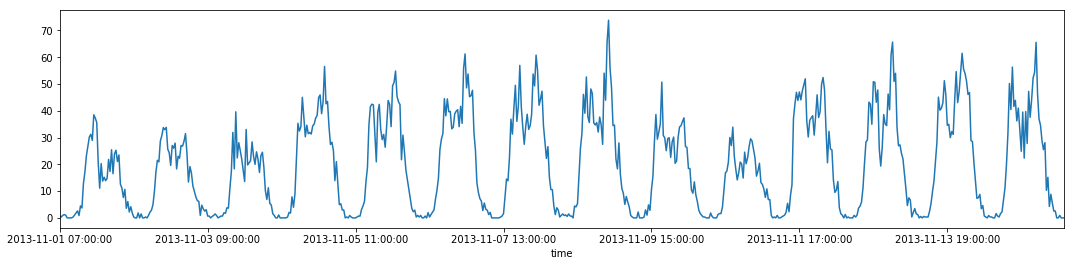

In [47]:
grid2499[:680].set_index('time')['call_out'].plot(figsize =(18,4))

## call and internet

**从数据可以看出，网络活跃时间会比通话时间持续稍长，滞后**

**所以可考虑用前面时刻的通话数据来预测流量**

**通话强度在周末稍弱，网络强度基本一致**

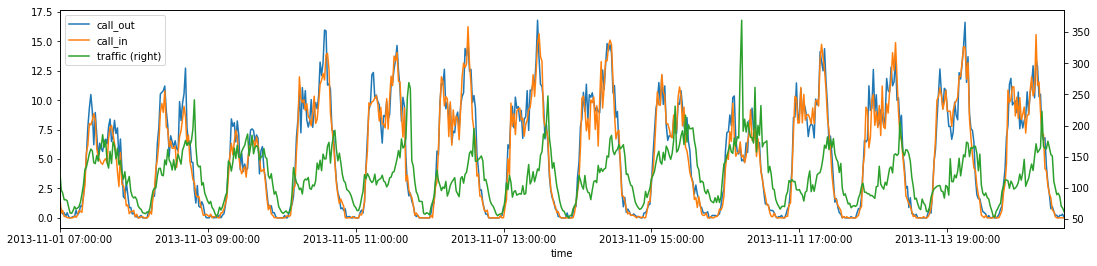

In [48]:
grid1[:680].set_index('time')[['call_out','call_in','traffic']].plot(figsize =(18,4),secondary_y=['traffic'])

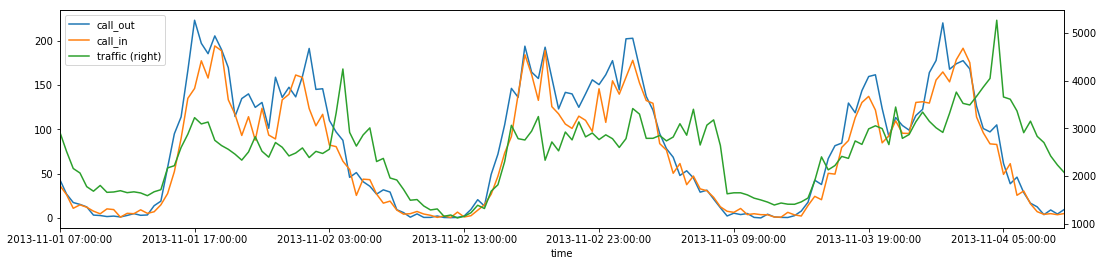

In [49]:
grid1375[:150].set_index('time')[['call_out','call_in','traffic']].plot(figsize =(18,4),secondary_y=['traffic'])

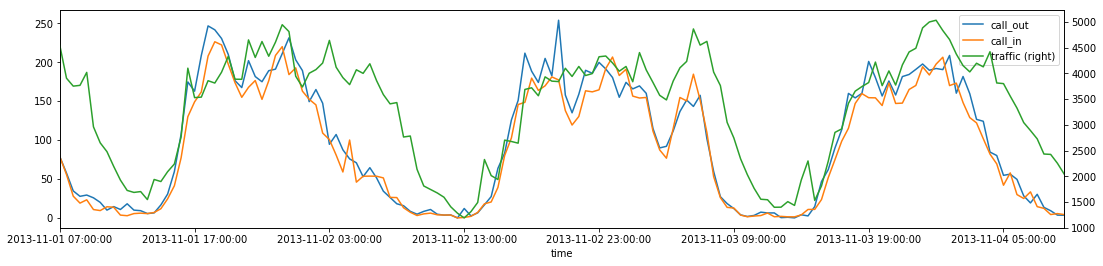

In [50]:
grid1428[:150].set_index('time')[['call_out','call_in','traffic']].plot(figsize =(18,4),secondary_y=['traffic'])

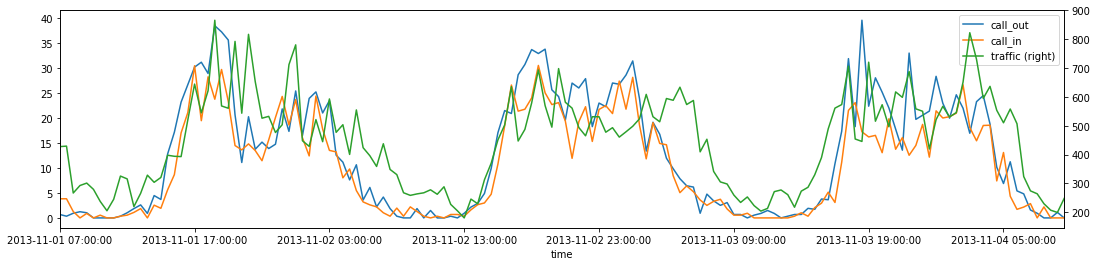

In [51]:
grid2499[:150].set_index('time')[['call_out','call_in','traffic']].plot(figsize =(18,4),secondary_y=['traffic'])

## sms and internet

**从数据看不出sms和traffic之间的显著关系**

**所以sms对traffic的影响应该是地区相关的**

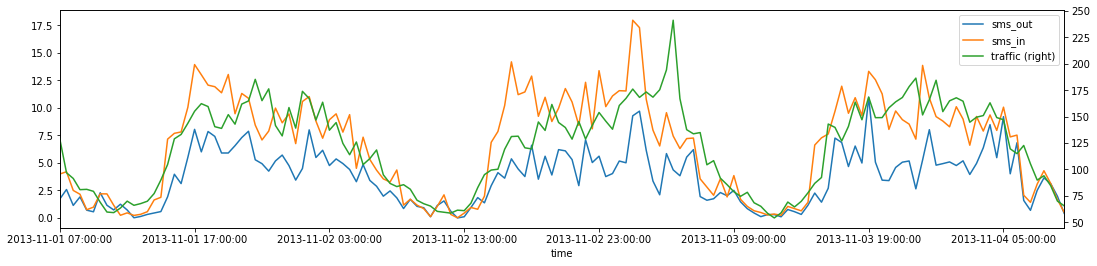

In [52]:
grid1[:150].set_index('time')[['sms_out','sms_in','traffic']].plot(figsize =(18,4),secondary_y=['traffic'])

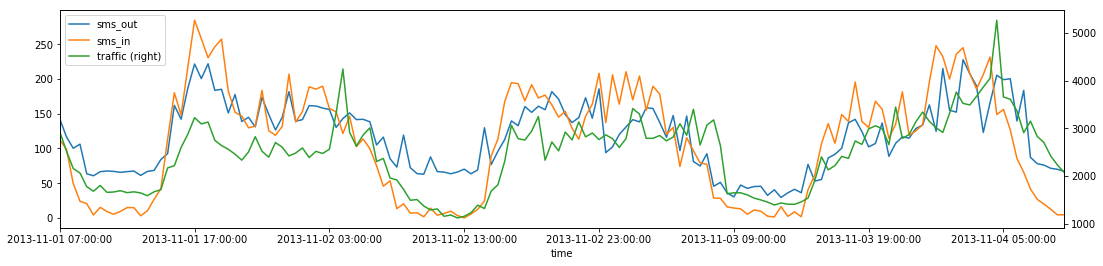

In [53]:
grid1375[:150].set_index('time')[['sms_out','sms_in','traffic']].plot(figsize =(18,4),secondary_y=['traffic'])

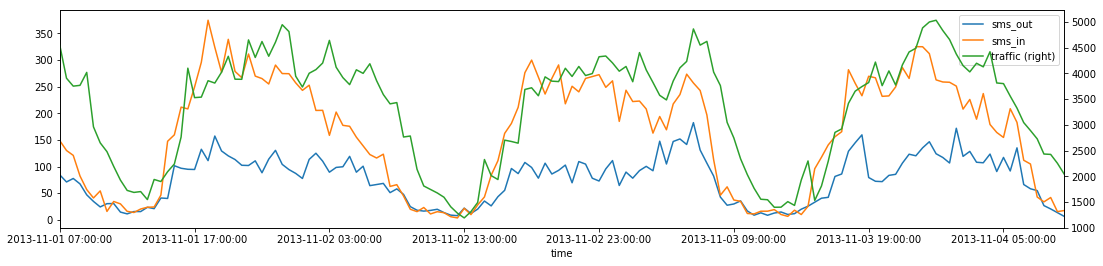

In [54]:
grid1428[:150].set_index('time')[['sms_out','sms_in','traffic']].plot(figsize =(18,4),secondary_y=['traffic'])

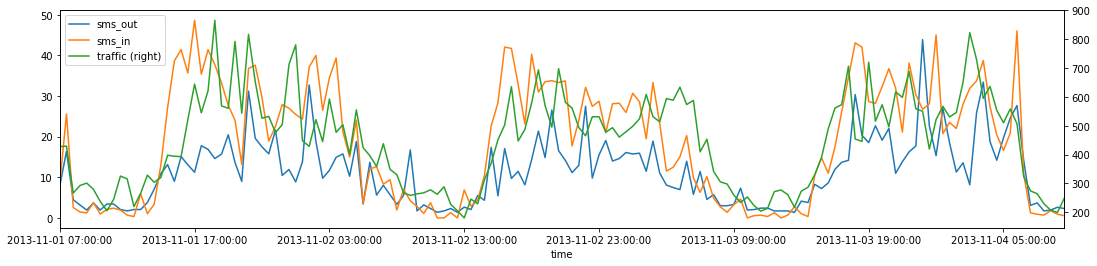

In [55]:
grid2499[:150].set_index('time')[['sms_out','sms_in','traffic']].plot(figsize =(18,4),secondary_y=['traffic'])

## call_in and call_out

**呼入呼出的曲线基本一致**

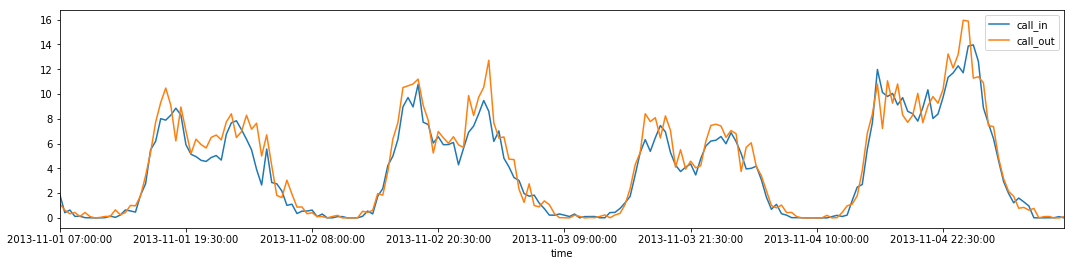

In [56]:
grid1[:200].set_index('time')[['call_in','call_out']].plot(figsize =(18,4))

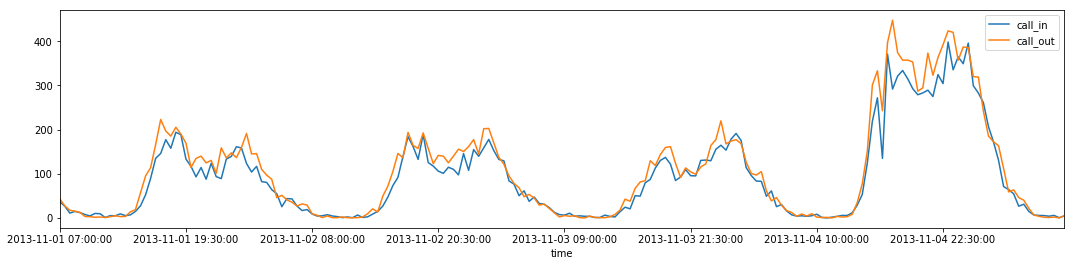

In [57]:
grid1375[:200].set_index('time')[['call_in','call_out']].plot(figsize =(18,4))

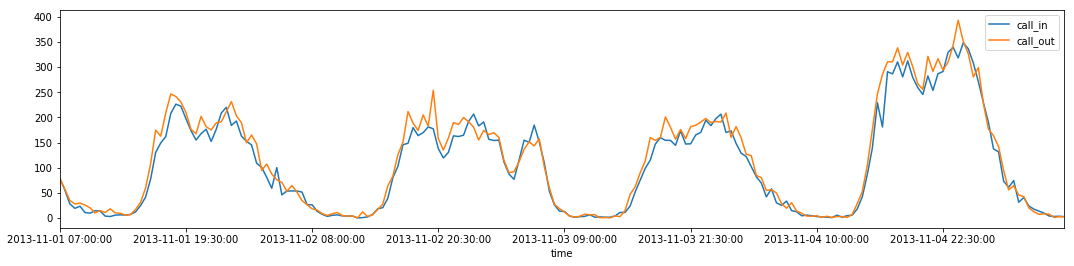

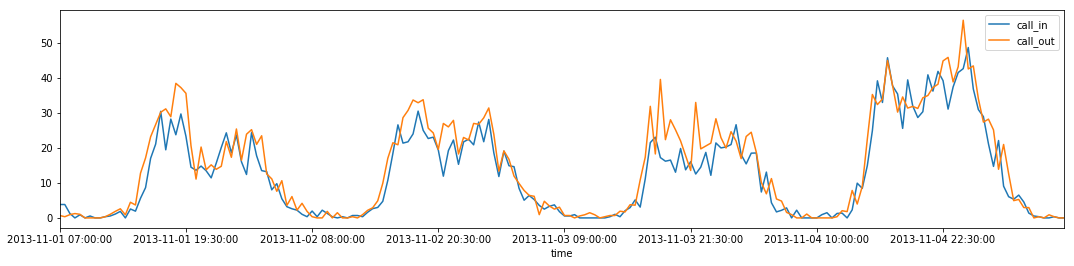

In [58]:
grid1428[:200].set_index('time')[['call_in','call_out']].plot(figsize =(18,4))
grid2499[:200].set_index('time')[['call_in','call_out']].plot(figsize =(18,4))